In [1]:
#basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Tensorflow pacakeges
import tensorflow as tf

In [3]:
# load dataset 

train_data_path = "C:/Users/DELL/VISHNU_AM/GitHub/Django_meachineLearning/Image_classification_python/players_image/Train_dataset"
test_data_path  = "C:/Users/DELL/VISHNU_AM/GitHub/Django_meachineLearning/Image_classification_python/players_image/Test_dataset"
valid_data_path = "C:/Users/DELL/VISHNU_AM/GitHub/Django_meachineLearning/Image_classification_python/players_image/Valid_dataset"

In [4]:
#image size arrange

image_width = 180
image_hieght= 180

In [5]:
#load data_file train dataset


data_train =tf.keras.utils.image_dataset_from_directory(train_data_path,
                                                        shuffle=True,
                                                        image_size=(image_hieght,image_width),
                                                        batch_size=32,
                                                        validation_split=False)

Found 341 files belonging to 5 classes.


In [7]:
# show the class names

data_cate = data_train.class_names

In [8]:
#load data_file test dataset


data_test =tf.keras.utils.image_dataset_from_directory(test_data_path,
                                                        shuffle=True,
                                                        image_size=(image_hieght,image_width),
                                                        batch_size=32,
                                                        validation_split=False)

Found 341 files belonging to 5 classes.


In [9]:
#load data_file validation dataset


data_valida =tf.keras.utils.image_dataset_from_directory(valid_data_path,
                                                    
                                                        image_size=(image_hieght,image_width),
                                                        batch_size=32,
                                                        )

Found 341 files belonging to 5 classes.


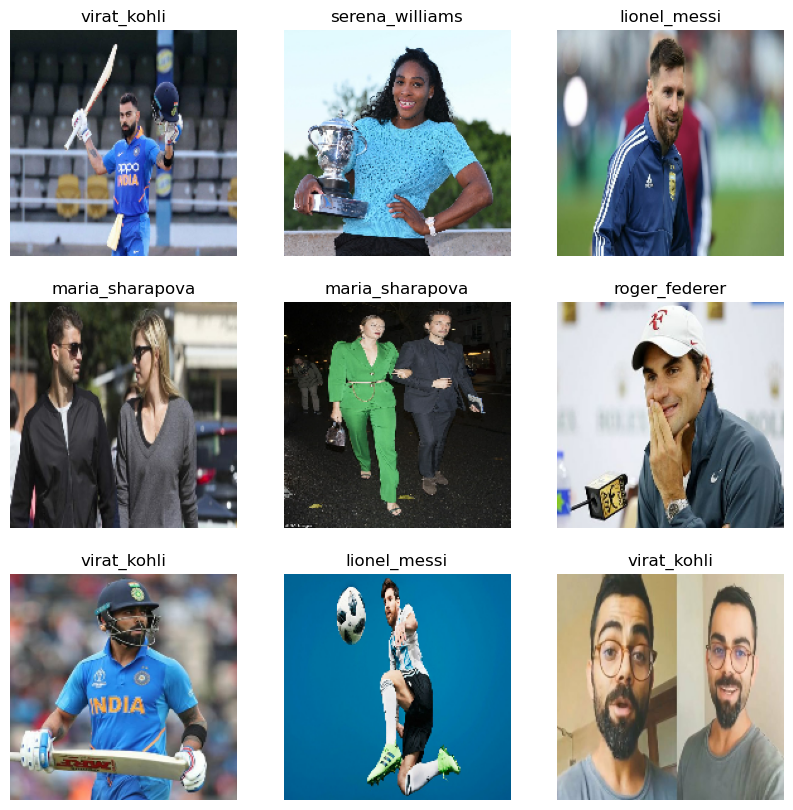

In [13]:
#show the dataset in graphical

plt.figure(figsize=(10,10))
for img,label in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(data_cate[label[i]])
        plt.axis('off')

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers

In [28]:
# model create

model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16,3, padding='same', activation ='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cate))
])

In [38]:
# model compile

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [40]:
#model fit and train

epochs_size =10
history = model.fit(data_train,validation_data=data_valida,epochs=epochs_size)

Epoch 1/10
11/11 [==============================] - 19s 2s/step - loss: 1.5623 - accuracy: 0.3519 - val_loss: 1.4019 - val_accuracy: 0.4839
Epoch 2/10
11/11 [==============================] - 18s 1s/step - loss: 1.2936 - accuracy: 0.5396 - val_loss: 1.0639 - val_accuracy: 0.6657
Epoch 3/10
11/11 [==============================] - 18s 1s/step - loss: 1.0261 - accuracy: 0.6364 - val_loss: 0.7859 - val_accuracy: 0.7801
Epoch 4/10
11/11 [==============================] - 18s 1s/step - loss: 0.7146 - accuracy: 0.7478 - val_loss: 0.4512 - val_accuracy: 0.8798
Epoch 5/10
11/11 [==============================] - 19s 1s/step - loss: 0.4241 - accuracy: 0.8622 - val_loss: 0.3112 - val_accuracy: 0.9355
Epoch 6/10
11/11 [==============================] - 18s 1s/step - loss: 0.2523 - accuracy: 0.9267 - val_loss: 0.1388 - val_accuracy: 0.9765
Epoch 7/10
11/11 [==============================] - 18s 1s/step - loss: 0.1335 - accuracy: 0.9707 - val_loss: 0.0478 - val_accuracy: 1.0000
Epoch 8/10
11/11 [==

In [49]:
# Test image 

image = "C:/Users/DELL/VISHNU_AM/GitHub/Django_meachineLearning/Image_classification_python/kohli_1.jpg"
image = tf.keras.utils.load_img(image,target_size=(image_hieght,image_width))
image_array = tf.keras.utils.array_to_img(image)
image_batch = tf.expand_dims(image_array,0)

In [50]:
prediction = model.predict(image_batch)

1/1 [==============================] - 0s 194ms/step


In [51]:
score = tf.nn.softmax(prediction)

In [53]:
val_loss, val_accuracy = model.evaluate(data_valida)
print("Validation Accuracy:", val_accuracy)

11/11 [==============================] - 7s 230ms/step - loss: 0.0074 - accuracy: 1.0000
Validation Accuracy: 1.0


In [58]:
print("Player {} with accuracy score of {:0.2f}".format(data_cate[np.argmax(score)],np.max(score*100)))

Player virat_kohli with accuracy score of 52.67


In [55]:
model.save('image_cls_players')

INFO:tensorflow:Assets written to: image_cls_players\assets


INFO:tensorflow:Assets written to: image_cls_players\assets


In [59]:
import joblib

In [61]:
joblib.dump(cls,'image_cls_ply.joblib')

NameError: name 'cls' is not defined

In [69]:
model.save(os.path.join('models','imageclassifier_player.h5'))

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [68]:
import os